In [4]:
!pip install tf_keras


In [3]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [5]:

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
!pip install kaggle

In [6]:
kaggle_credentails = json.load(open("/content/kaggle (2).json"))

In [10]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]


In [11]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
... resuming from 1174405120 bytes (1723304067 bytes left) ...
100% 2.69G/2.70G [00:15<00:00, 166MB/s]
100% 2.70G/2.70G [00:15<00:00, 113MB/s]


In [12]:
!ls

'kaggle (2).json'   new-plant-diseases-dataset.zip   sample_data


In [13]:
 #Unzip the downloaded dataset
with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [13]:
cnn = tf.keras.models.Sequential()

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 69ms/step - accuracy: 0.3855 - loss: 2.1917 - val_accuracy: 0.8395 - val_loss: 0.5139
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 181s 65ms/step - accuracy: 0.8298 - loss: 0.5384 - val_accuracy: 0.9014 - val_loss: 0.3071
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 201s 65ms/step - accuracy: 0.9031 - loss: 0.3005 - val_accuracy: 0.9178 - val_loss: 0.2560
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 201s 65ms/step - accuracy: 0.9336 - loss: 0.2028 - val_accuracy: 0.9490 - val_loss: 0.1605
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 62ms/step - accuracy: 0.9528 - loss: 0.1419 - val_accuracy: 0.9509 - val_loss: 0.1583
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9632 - loss: 0.1144 - val_accuracy: 0.9633 - val_loss: 0.1178
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 196s 62ms/step - accuracy: 0.9694 - loss: 0.0905 - val_accuracy: 0.9512 - val_loss: 0.1803
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.9880 - loss: 0.0386
Training accuracy: 0.989387571811676


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9634 - loss: 0.1354
Validation accuracy: 0.9631800651550293


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5884202122688293,
  0.8536595702171326,
  0.9141759872436523,
  0.9401806592941284,
  0.9555302858352661,
  0.9657585620880127,
  0.970808744430542,
  0.9755459427833557,
  0.9789600968360901,
  0.9810939431190491,
  0.9855181574821472,
  0.985475480556488,
  0.9870830178260803,
  0.9869407415390015,
  0.9884629249572754],
 'loss': [1.3986014127731323,
  0.4595607817173004,
  0.26630669832229614,
  0.1843150407075882,
  0.1356680542230606,
  0.10613511502742767,
  0.0865808054804802,
  0.0761079415678978,
  0.06418246030807495,
  0.05767298489809036,
  0.04737212881445885,
  0.04553535208106041,
  0.04187164083123207,
  0.041016384959220886,
  0.03588004782795906],
 'val_accuracy': [0.8395174145698547,
  0.9013772010803223,
  0.9177669286727905,
  0.9490097761154175,
  0.9508877992630005,
  0.9632938504219055,
  0.9512292146682739,
  0.9654564261436462,
  0.9661393165588379,
  0.9688709378242493,
  0.9615297317504883,
  0.9631800651550293,
  0.9656840562820435,
  0.9716

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


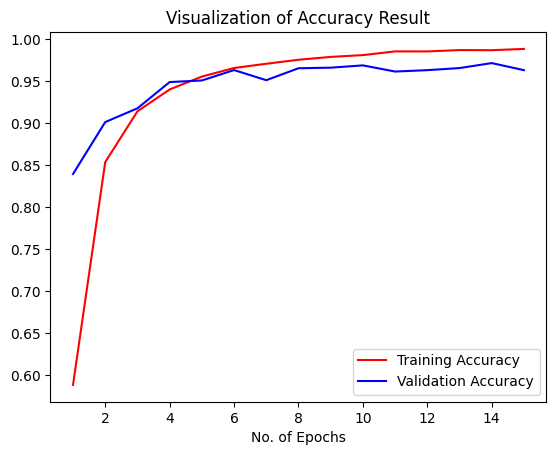

In [27]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [28]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.98       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

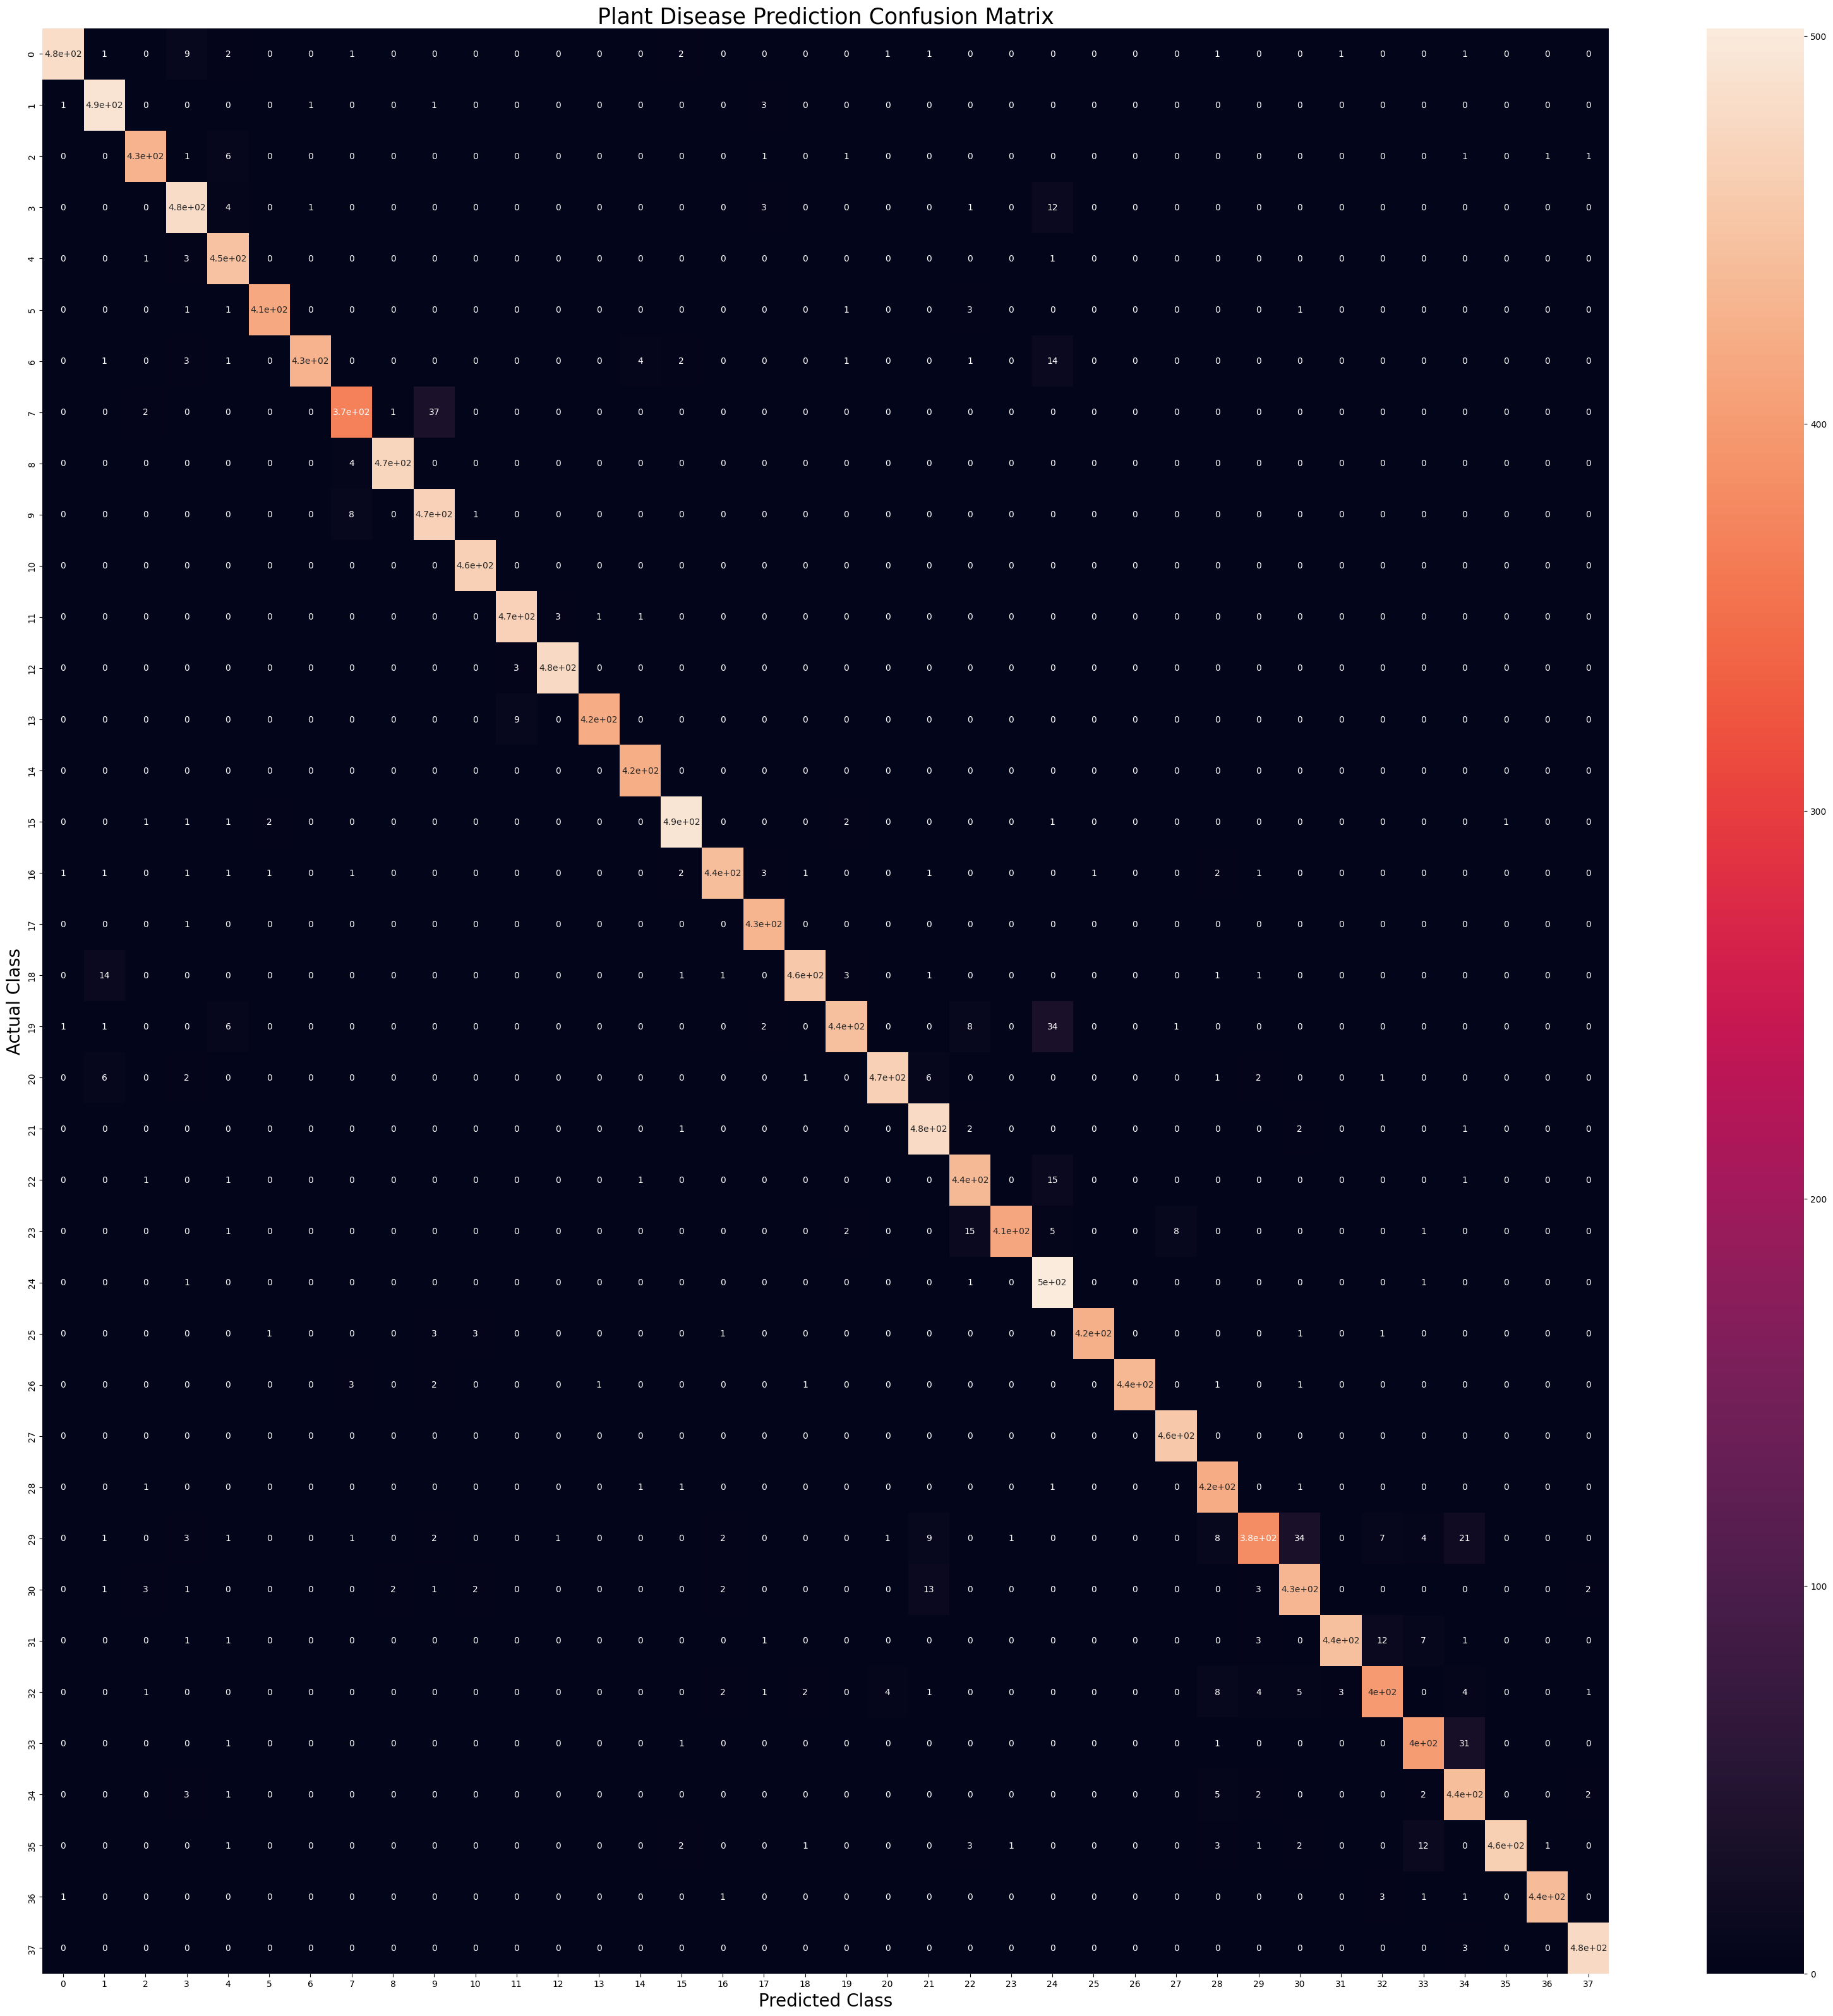

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [18]:
cnn = tf.keras.models.load_model('/content/trained_plant_disease_model.keras')

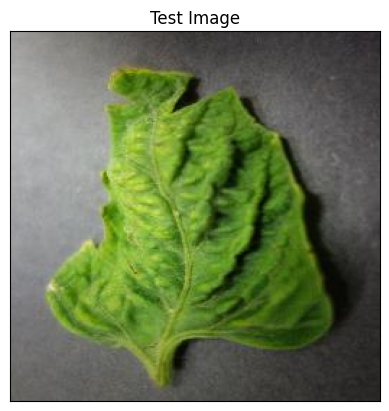

In [19]:
#Test Image Visualization
import cv2
image_path = '/content/test/test/TomatoYellowCurlVirus4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [21]:
print(predictions)

[[1.16446364e-08 4.00258404e-09 4.64276809e-06 1.82155205e-07
  2.51759229e-05 3.45950980e-06 5.23638066e-09 2.09778328e-09
  3.26399567e-11 1.12693277e-09 1.78530080e-08 2.29764873e-06
  1.44044421e-07 4.83914619e-06 2.29282409e-06 4.87150089e-07
  5.97596355e-08 1.25761716e-07 1.07114420e-06 5.41860180e-04
  6.12069673e-10 8.94189114e-08 3.02071453e-06 1.11568219e-03
  2.53937396e-05 1.83704981e-06 1.23543856e-07 9.43802024e-06
  8.82946479e-05 1.49055195e-05 5.50230880e-06 3.15702891e-06
  1.53226028e-05 2.66254488e-02 1.58270597e-02 9.50772226e-01
  4.37153317e-03 5.34311228e-04]]


In [22]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


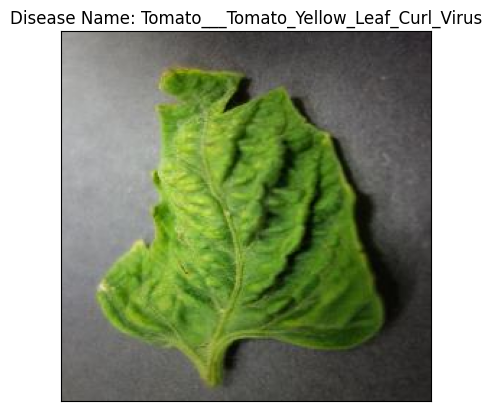

In [23]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()